
# Spring-slider simulations with Rate and State Friction (RSF)

We start by importing the necessary libraries and pointing to the QDYN executable:

In [1]:
# Make plots interactive in the notebook
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np
import os
import sys

# Add QDYN source directory to PATH
base_dir = os.path.expanduser("~")
qdyn_dir = os.path.join(base_dir, "qdyn", "qdyn")
sys.path.append(qdyn_dir)

# Import QDYN wrapper
from pyqdyn import qdyn

The simulation parameters are accessible after instantiation of the QDYN class as a Python dictionary object. We first define a number of global simulation parameters:

In [2]:
# Instantiate the QDYN class object
p = qdyn()

# Get the settings dict
set_dict = p.set_dict

# Global simulation parameters
set_dict["MESHDIM"] = 0        # Simulation dimensionality (spring-block)
set_dict["TMAX"] = 300         # Maximum simulation time [s]
set_dict["NTOUT_OT"] = 1       # Temporal interval (number of time steps) for time series output
set_dict["V_PL"] = 1e-5        # Load-point velocity [m/s]
set_dict["MU"] = 2e9           # Shear modulus [Pa]
set_dict["SIGMA"] = 5e6        # Effective normal stress [Pa]
set_dict["ACC"] = 1e-7         # Solver accuracy
set_dict["SOLVER"] = 2         # Solver type (Runge-Kutta)

# To switch to rate-and-state friction ("RSF")
set_dict["FRICTION_MODEL"] = "RSF"

# Print out the input parameters
for x in set_dict:
    if x.startswith('SET_DICT'):
        pass
    else:
        print("{}> {}".format(x.ljust(20, '-'), set_dict[x])) 

FRICTION_MODEL------> RSF
MESHDIM-------------> 0
FINITE--------------> 1
SOLVER--------------> 2
FAULT_TYPE----------> 1
V_PL----------------> 1e-05
L-------------------> 1
W-------------------> 50000.0
SIGMA---------------> 5000000.0
VS------------------> 3000
MU------------------> 2000000000.0
LAM-----------------> 30000000000.0
TPER----------------> 31536000
APER----------------> 0
DIP_W---------------> 90
Z_CORNER------------> 0
FAULT_LABEL---------> 1
N_FAULTS------------> -1
FEAT_STRESS_COUPL---> 0
FEAT_TP-------------> 0
FEAT_LOCALISATION---> 0
RESTART_STEP--------> 0
RESTART_TIME--------> 0
RESTART_SLIP--------> 0
D-------------------> 0
HD------------------> 0
N-------------------> -1
NX------------------> 1
NW------------------> -1
DW------------------> 1
TMAX----------------> 300
NSTOP---------------> 0
DTTRY---------------> 0.1
DTMAX---------------> 0
ACC-----------------> 1e-07
V_TH----------------> 0.01
NTOUT_LOG-----------> 10
NTOUT_OT------------> 1
NTOUT_OX-----------

Above you see the general settings parametes for the simulation. Lets define now the frictional parameters.

In [3]:
set_dict["SET_DICT_RSF"] = p.set_dict["SET_DICT_RSF"] # copy default parameters
set_dict["SET_DICT_RSF"]["RNS_LAW"] = 0                # Classical rate-and-state
set_dict["SET_DICT_RSF"]["THETA_LAW"] = 1             # Ageing law
set_dict["SET_DICT_RSF"]["A"] = 0.01                  # Direct effect parameter [-]
set_dict["SET_DICT_RSF"]["B"] = 0.015                 # Evolution effect parameters [-]
set_dict["SET_DICT_RSF"]["DC"] = 1e-5                 # Characteristic slip distance [m]
set_dict["SET_DICT_RSF"]["V_SS"] = set_dict["V_PL"]   # Reference velocity [m/s]

# Initial slip velocity [m/s]
set_dict["SET_DICT_RSF"]["V_0"] = 1.01 * set_dict["V_PL"]
# Initial state [s]
set_dict["SET_DICT_RSF"]["TH_0"] = set_dict["SET_DICT_RSF"]["DC"] / set_dict["V_PL"]

# Print out the frictional parameters
for x in set_dict["SET_DICT_RSF"]:
    print("{}> {}".format(x.ljust(20, '-'), set_dict["SET_DICT_RSF"][x])) 


RNS_LAW-------------> 0
THETA_LAW-----------> 1
A-------------------> 0.01
B-------------------> 0.015
DC------------------> 1e-05
V1------------------> 0.01
V2------------------> 1e-07
MU_SS---------------> 0.6
V_SS----------------> 1e-05
CO------------------> 0
TH_0----------------> 1.0
TAU-----------------> -1.0
INV_VISC------------> 0.0
V_0-----------------> 1.0100000000000002e-05


Lastly, we pass the settings to the QDYN wrapper, generate the mesh (only 1 element) and write the `qdyn.in` input file:

In [4]:
p.settings(set_dict)
p.render_mesh()
p.write_input()

True

The `p.write()` command writes a `qdyn.in` file to the current working directory. You may want to check out this file in the working directory. QDYN reads this file at the start of the simulation and allocate necessarry variables.To do this, call `p.run()`. Note that in this notebook, the screen output (`stdout`) is captured by the console, so you won't see any output here.

In [5]:
p.run()

True

The simulation output is read and processed by the wrapper using:

In [6]:
p.read_output(read_ox=False)

True

The simulation time series output is then stored in `p.ot`

In [7]:
p.ot[0]

,step,t,potcy,pot_rate,v,theta,tau,dtau_dt,slip,sigma,fault_label
0,0,0.000000,0.000000e+00,1.010000e-05,1.010000e-05,1.000000,3000498.0,0.0,0.000000e+00,5000000.0,1
1,1,0.000068,6.059607e-10,1.009992e-05,1.009992e-05,1.000007,3000498.0,0.0,6.059607e-10,5000000.0,1
2,2,0.000130,1.230405e-09,1.009992e-05,1.009992e-05,1.000007,3000498.0,0.0,1.230405e-09,5000000.0,1
3,3,0.000439,4.352634e-09,1.009996e-05,1.009996e-05,1.000004,3000498.0,0.0,4.352634e-09,5000000.0,1
4,4,0.001985,1.996394e-08,1.010013e-05,1.010013e-05,0.999988,3000497.0,0.0,1.996394e-08,5000000.0,1
...,...,...,...,...,...,...,...,...,...,...,...
1087,1087,294.433362,2.969597e-03,1.048269e-07,1.048269e-07,10.717860,2949992.0,0.0,2.969597e-03,5000000.0,1
1088,1088,296.109253,2.969821e-03,1.685603e-07,1.685603e-07,12.136080,2983061.0,0.0,2.969821e-03,5000000.0,1
1089,1089,297.785144,2.970189e-03,2.817464e-07,2.817464e-07,13.340380,3015843.0,0.0,2.970189e-03,5000000.0,1
1090,1090,298.892572,2.970565e-03,4.048859e-07,4.048859e-07,13.934470,3037241.0,0.0,2.970565e-03,5000000.0,1


To see the behaviour of our spring-block fault, we can plot the time series of (normalised) shear stress, state, and slip velocity:

<IPython.core.display.Javascript object>


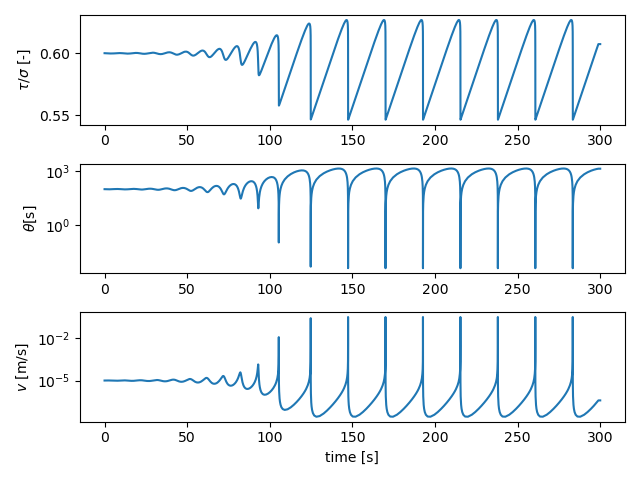

In [8]:
plt.figure()

# Normalised shear stress
plt.subplot(311)
plt.plot(p.ot[0]["t"], p.ot[0]["tau"] / set_dict["SIGMA"])
plt.ylabel(r"$\tau / \sigma$ [-]")

# Porosity
plt.subplot(312)
plt.semilogy(p.ot[0]["t"], 100 * p.ot[0]["theta"])
plt.ylabel(r"$\theta$[s]")

# Velocity
plt.subplot(313)
plt.plot(p.ot[0]["t"], p.ot[0]["v"])
plt.yscale("log")
plt.ylabel(r"$v$ [m/s]")
plt.xlabel("time [s]")

plt.tight_layout()
plt.show()

Let us now look at the phase plots.

<IPython.core.display.Javascript object>


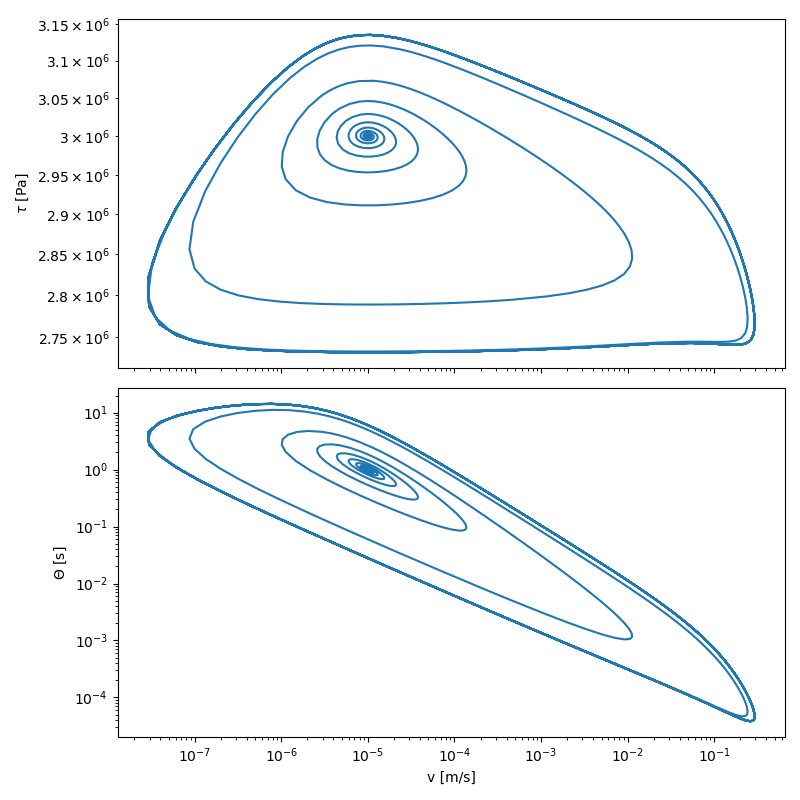

In [9]:
fig,ax= plt.subplots(2,1,sharex=True, figsize = (8,8))

ax[0].loglog(p.ot[0]["v"],p.ot[0]["tau"])
ax[0].set_ylabel('$\\tau$ [Pa]')
ax[1].loglog(p.ot[0]["v"],p.ot[0]["theta"])
ax[1].set_ylabel('$\\Theta$ [s]')
ax[1].set_xlabel('v [m/s]')
fig.tight_layout()


## Exercise

Try simulations with different initial variables (Hint: Change set_dict["SET_DICT_RSF"]["V_0"] and set_dict["SET_DICT_RSF"]["TH_0"]). Check if they converge to a limit cycle as in the example. 

Try also changing stifness of the system (k = mu/L where mu and L denote shear modulus and the fault length). 